<Figure size 1000x600 with 0 Axes>

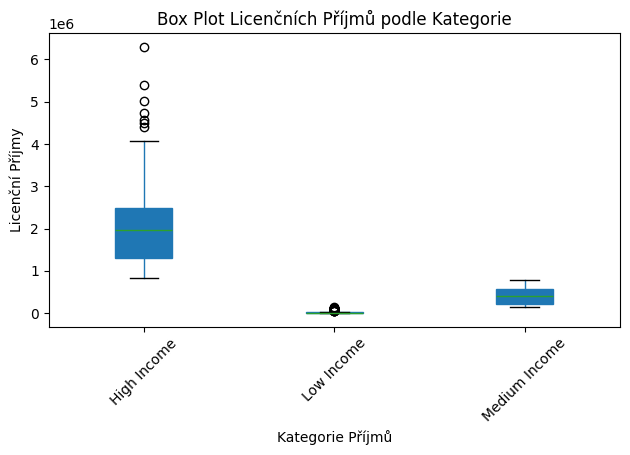

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Nahraďte cestu k vašemu souboru
file_path = 'licencni_prijmy_inc_kateg.csv'  
data_with_categories = pd.read_csv(file_path)

# Vytvoření boxplotu
plt.figure(figsize=(10, 6))
boxplot = data_with_categories.boxplot(
    column='Licencni_prijem',  # Sloupec s příjmy
    by='IncomeCategory',       # Nový sloupec s kategoriemi příjmů
    grid=False,
    patch_artist=True
)

# Přizpůsobení vzhledu grafu
plt.title('Box Plot Licenčních Příjmů podle Kategorie')
plt.suptitle('')  # Odstranění nadpisu "by ..."
plt.xlabel('Kategorie Příjmů')
plt.ylabel('Licenční Příjmy')
plt.xticks(rotation=45)
plt.tight_layout()

# Zobrazení grafu
plt.show()


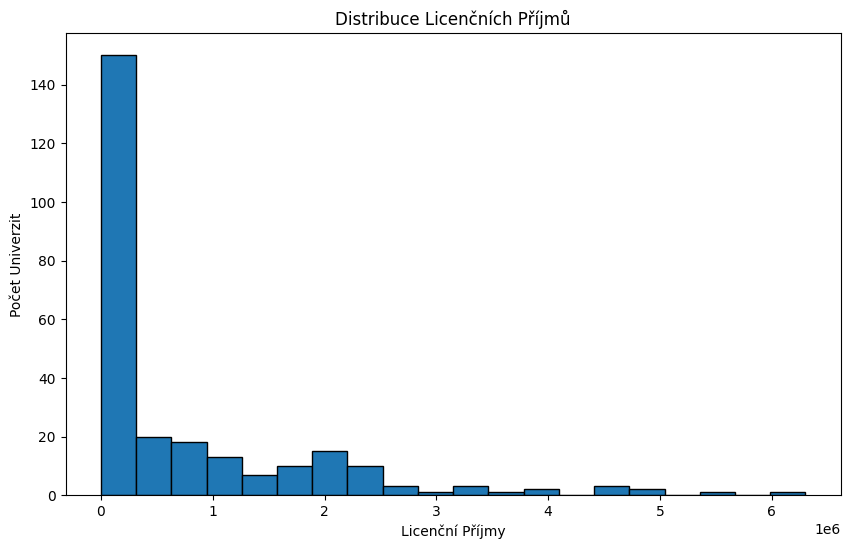

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(data_with_categories['Licencni_prijem'], bins=20, edgecolor='black')
plt.title('Distribuce Licenčních Příjmů')
plt.xlabel('Licenční Příjmy')
plt.ylabel('Počet Univerzit')
plt.show()


In [4]:
print(data_with_categories['IncomeCategory'].value_counts())

IncomeCategory
Low Income       130
High Income       78
Medium Income     52
Name: count, dtype: int64


In [9]:
print(data_with_categories['Licencni_prijem'].head())
print(data_with_categories['Licencni_prijem'].unique())


0    347000
1    478000
2    273000
3    868000
4    267000
Name: Licencni_prijem, dtype: int64
[ 347000  478000  273000  868000  267000  263000  716000  869000  785000
 1269000       0 1971000 2071000 2171000 1851000 1227000 2980000 4498000
 4413000 4733000  230000   20000   16000   72000  110000   56000  113000
   65000   62000  260000  104000  289000   84000 5387000  173000  398000
  770000 1924000  431000 1502000 5029000 1525000 3328000 1828000 1990000
 2547000 2109000 2465000 2236000 2065000 2259000 2350000 2382000 3525000
    2000    1000  187000  226000  149000  120000 6301000 1489000 1732000
 1831000  971000  612000  836000 1801000  213000 1165000    3000   10000
  130000  848000   39000   30000  851000  165000  725000   29000  114000
  797000 1185000  360000 2503000  488000  787000 1038000  705000  764000
 1968000  738000   12000 2740000 2183000 1625000 1834000 2076000  382000
  100000   50000  454000  637000  117000  299000  830000 2458000  119000
   28000   80000  156000  14

In [11]:
print(data_with_categories['Licencni_prijem'].dtype)


int64


In [12]:
import pandas as pd

# Rozdělení příjmů do kvartilů pomocí pd.qcut
try:
    data_with_categories['IncomeCategory'] = pd.qcut(
        data_with_categories['Licencni_prijem'], 
        q=4, 
        labels=['Low Income', 'Lower-Medium Income', 'Upper-Medium Income', 'High Income']
    )
except ValueError as e:
    print("Error with qcut: ", e)


Error with qcut:  Bin edges must be unique: Index([0.0, 0.0, 146500.0, 1039250.0, 6301000.0], dtype='float64', name='Licencni_prijem').
You can drop duplicate edges by setting the 'duplicates' kwarg


In [15]:
bins = [-1, 0, 100000, 500000, 1000000, data_with_categories['Licencni_prijem'].max()]
labels = ['Zero Income', 'Low Income', 'Lower-Medium Income', 'Upper-Medium Income', 'High Income']

data_with_categories['IncomeCategory'] = pd.cut(
    data_with_categories['Licencni_prijem'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


In [14]:
print(data_with_categories['Licencni_prijem'].describe())
print(data_with_categories['Licencni_prijem'].value_counts().head(10))  # Nejčastější hodnoty


count    2.600000e+02
mean     7.444846e+05
std      1.139499e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.465000e+05
75%      1.039250e+06
max      6.301000e+06
Name: Licencni_prijem, dtype: float64
Licencni_prijem
0          83
5000        5
56000       3
10000       3
72000       2
20000       2
2171000     2
2503000     2
100000      2
1968000     2
Name: count, dtype: int64


In [16]:
print(data_with_categories['IncomeCategory'].value_counts())


IncomeCategory
Zero Income            83
High Income            68
Lower-Medium Income    44
Low Income             36
Upper-Medium Income    29
Name: count, dtype: int64


In [17]:
# Kategorie pro nulové hodnoty
data_with_categories['IncomeCategory'] = 'Zero Income'

# Použití qcut pouze pro nenulové hodnoty
data_with_categories.loc[data_with_categories['Licencni_prijem'] > 0, 'IncomeCategory'] = pd.qcut(
    data_with_categories.loc[data_with_categories['Licencni_prijem'] > 0, 'Licencni_prijem'],
    q=4,
    labels=['Low Income', 'Lower-Medium Income', 'Upper-Medium Income', 'High Income']
)


In [18]:
# Nejprve vytvoříme samostatnou kategorii pro nulové hodnoty
data_with_categories['IncomeCategory'] = 'Zero Income'  # Nastavení defaultní kategorie pro nuly

# Aplikace pd.qcut na nenulové hodnoty
data_with_categories.loc[data_with_categories['Licencni_prijem'] > 0, 'IncomeCategory'] = pd.qcut(
    data_with_categories.loc[data_with_categories['Licencni_prijem'] > 0, 'Licencni_prijem'],
    q=4,  # Rozdělení na čtyři kvartily
    labels=['Low Income', 'Lower-Medium Income', 'Upper-Medium Income', 'High Income'],
    duplicates='drop'  # Odstraní duplicitní hranice
)

# Kontrola výsledků
print(data_with_categories['IncomeCategory'].value_counts())


IncomeCategory
Zero Income            83
Low Income             45
Lower-Medium Income    44
Upper-Medium Income    44
High Income            44
Name: count, dtype: int64


In [19]:
# Počet univerzit v jednotlivých kategoriích
print(data_with_categories['IncomeCategory'].value_counts())

# Zobrazení vzorku dat
print(data_with_categories[['Licencni_prijem', 'IncomeCategory']].head(10))


IncomeCategory
Zero Income            83
Low Income             45
Lower-Medium Income    44
Upper-Medium Income    44
High Income            44
Name: count, dtype: int64
   Licencni_prijem       IncomeCategory
0           347000  Lower-Medium Income
1           478000  Lower-Medium Income
2           273000  Lower-Medium Income
3           868000  Upper-Medium Income
4           267000  Lower-Medium Income
5           263000  Lower-Medium Income
6           716000  Upper-Medium Income
7           869000  Upper-Medium Income
8           785000  Upper-Medium Income
9          1269000  Upper-Medium Income


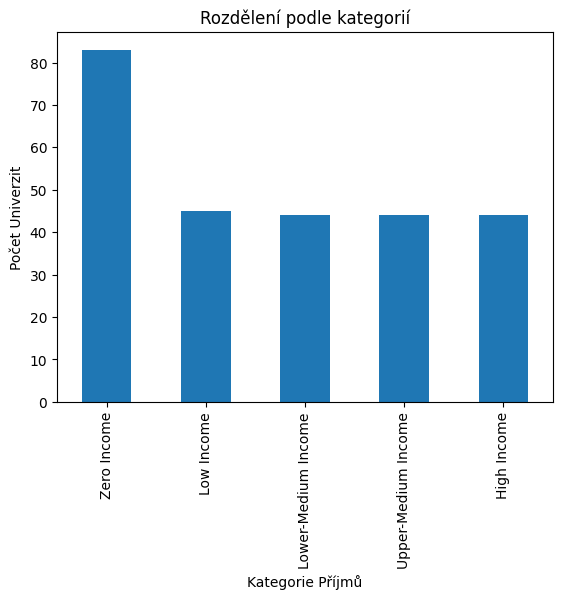

In [21]:
data_with_categories['IncomeCategory'].value_counts().plot(kind='bar', title='Rozdělení podle kategorií')
plt.xlabel('Kategorie Příjmů')
plt.ylabel('Počet Univerzit')
plt.show()


<Figure size 1000x600 with 0 Axes>

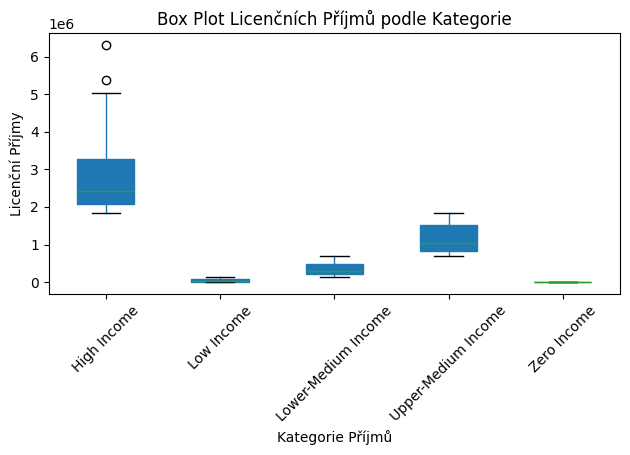

In [22]:
import matplotlib.pyplot as plt

# Vytvoření boxplotu podle kategorií příjmů
plt.figure(figsize=(10, 6))
boxplot = data_with_categories.boxplot(
    column='Licencni_prijem',          # Sloupec s příjmy
    by='IncomeCategory',              # Sloupec s kategoriemi příjmů
    grid=False,
    patch_artist=True                 # Barevné vyplnění boxů
)

# Přizpůsobení vzhledu grafu
plt.title('Box Plot Licenčních Příjmů podle Kategorie')
plt.suptitle('')  # Odstranění automatického podnadpisu
plt.xlabel('Kategorie Příjmů')
plt.ylabel('Licenční Příjmy')
plt.xticks(rotation=45)
plt.tight_layout()

# Zobrazení grafu
plt.show()
